i523 Fall 2017
class page: https://cloudmesh.github.io/classes/

This is a short introduction to Python Notebooks. You may be familiar with iPython Notebooks, which are associated with Python 2. Jupyter Notebooks work for Python 2 and 3, so we'll use those. One nice feature is Markdown cells, which let me add text like this.

Assuming you've set up your VM and Python environments as specified on the course website, install Jupyter Notebooks on the command line with the following:

    pip install jupyter

To run Jupyter (in your browser), just type in this:

    jupyter notebook

You can save this notebook to your local machine by downloading it. Start up Jupyter and hit the upload button, then select the downloaded file. The file will be added to the dashboard. Click on it to run it. 

WARNING: Though Jupyter's documentation might encourage installation via Anaconda, DO NOT INSTALL ANACONDA--at least not for the duration of this course. Anaconda and other distributions mess up your Python environments, and fixing them afterward is unpleasant.

An excellent and (extremely) thorough tutorial on NumPy with an emphasis on complex dynamical systems is available from UC Davis:

Travis E. Oliphant (2006). "Guide to NumPy." UC Davis. Available online:
<http://csc.ucdavis.edu/~chaos/courses/nlp/Software/NumPyBook.pdf>.
Accessed September 1, 2017.

First we import some modules. We use the most common abbreviations. You might see them in other tutorials or Python scripts. To execute the following cell, click on it and hit the play |>| button at the top of the screen.

In [171]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Now we'll test out some features of Numpy. arange() is like range(), but for floating-point numbers. 

In [172]:
X = np.arange(0.2,1,.1)

In [173]:
print X

[ 0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


I've used this function to generate parameter spaces that I can then iterate (loop) over, say, if I wanted to use a grid search to find optimal parameters for a machine learning model.

In [174]:
P = 10.**np.arange(-7,1,1) # note that we raise 10. (float) and not 10 (int)

print P

[  1.00000000e-07   1.00000000e-06   1.00000000e-05   1.00000000e-04
   1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00]


In [175]:
for x,p in zip(X,P):
    print '%f, %f' % (x,p)

0.200000, 0.000000
0.300000, 0.000001
0.400000, 0.000010
0.500000, 0.000100
0.600000, 0.001000
0.700000, 0.010000
0.800000, 0.100000
0.900000, 1.000000


Now let's try plotting. We'll use the logistic function and a suitable dynamical function that produces interesting behaviors.

A good overview is available here:

David Lerner (2012). "Te Logistic Map and Chaos." Kansas University, Department of Mathematics.
Available online <http://www.math.ku.edu/~lerner/m221s12/LogisticLabII.pdf>.
Accessed September 1, 2017.

In [176]:
# the logistic function takes a parameter a and input value x
def logistic(a,x):
    return a*x*(1-x)

The following code to generate cobweb plots was adapted from:

Mark McClure (2016). "Some simple computation." UNCA. Available online:
<https://www.marksmath.org/classes/Spring2016NumericalAnalysis/demos/SomeSimpleComputations.html>.
Accessed September 1, 2017.

In [177]:
#gen_orbit takes in a function F that receives parameter a and seed value x0, and iterates 
#for at most n iterations.
def gen_orbit(F,a,x0,n):
    x1 = x0
    x2 = F(a,x1)
    
    X0 = [x0]
    X1 = [x1]
    
    for i in xrange(n):
        X0.extend([x1,x1])
        X1.extend([x2,x2])

        x1 = x2
        x2 = F(a,x2)
        
        # vanishing to zero
        if np.abs(X0[-1] - X1[-1]) < 10**(-8):
            break
        
    return X0,X1

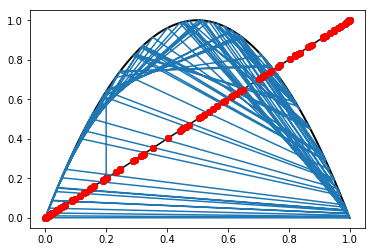

In [196]:
# using the logistic map

# change these parameter values as you wish, then rerun this cell to see the plot change
a = 3 # a more interesting value: a = 4
x0 = 0.2
X0, X2 = gen_orbit(logistic,a,x0,100)

# a linear space/grid for plotting reference curves
x_grid = np.linspace(0,1,100)

# layer on the various functions

# first, layer on the logistic and identity functions for reference
plt.plot(x_grid,map(lambda z: logistic(a,z),x_grid), 'k', linewidth=2)
plt.plot(x_grid,x_grid, 'k')

# now layer on the orbits
plt.plot(X0,X2)
plt.plot(X0,X0,'go')
plt.plot(X2,X2,'ro')

plt.show() # the final product!

In [189]:
plt.clf() # clear the figure

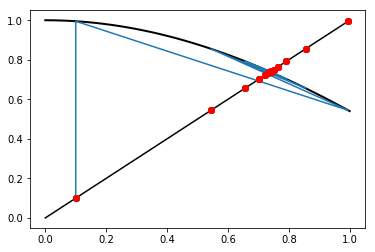

In [197]:
# now using cosine

# this wrapped cosine function takes a parameter a and input value x
def npcos(a,x):
    return a*np.cos(x)

# parameters
a = 1
x0 = 0.1
X0, X2 = gen_orbit(npcos,a,x0,100)
x_grid = np.linspace(0,1,100)

# layer on the reference functions
plt.plot(x_grid,map(lambda z: npcos(a,z),x_grid), 'k', linewidth=2)
plt.plot(x_grid,x_grid, 'k')

# layer the orbits
plt.plot(X0,X2)
plt.plot(X0,X0,'go')
plt.plot(X2,X2,'ro')

plt.show()

In [131]:
plt.clf() # clear the figure

You can similarly use other functions to observe convergence, divergences, cycles, or chaotic orbits. 

Now for something practical: eigendecompositions. 

In [200]:
from numpy import linalg 

A = np.diag((1,2,3))

w,v = linalg.eig(A)

print 'w =',w
print'and v =',v

w = [ 1.  2.  3.]
and v = [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


NumPy has many useful linear algebra features that you will undoubtedly run into, even if tangentially. Linear algebra (and eigendecompositions) power many data analysis techniques.